In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [3]:
#Load the data
company ='FB'
#start date
start=dt.datetime(2013,1,1)
#end date
end=dt.datetime(2020,1,1)
#extract data from Internet sources like yahoo finance
data=web.DataReader(company,'yahoo',start,end)


In [4]:
#scaling and translating each feature such that it is in the given range on the training set
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))



In [5]:
 prediction_days=60

 x_train=[]
 y_train=[]

In [6]:
for x in range(prediction_days,len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x,0])
  y_train.append(scaled_data[x,0])

  

In [7]:
x_train, y_train=np.array(x_train),np.array(y_train)

In [8]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))



In [9]:
#grouping a linear stack of layers into a model( Tensorflow - Keras)
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))

model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(units=50))

model.add(Dropout(0.2))

In [10]:
#prediction of next closing value
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25,batch_size=32)

Epoch 1/25
54/54 [==============================] - 10s 85ms/step - loss: 0.0244
Epoch 2/25
54/54 [==============================] - 5s 86ms/step - loss: 0.0043
Epoch 3/25
54/54 [==============================] - 5s 86ms/step - loss: 0.0036
Epoch 4/25
54/54 [==============================] - 5s 85ms/step - loss: 0.0042
Epoch 5/25
54/54 [==============================] - 5s 86ms/step - loss: 0.0035
Epoch 6/25
54/54 [==============================] - 5s 87ms/step - loss: 0.0036
Epoch 7/25
54/54 [==============================] - 5s 85ms/step - loss: 0.0033
Epoch 8/25
54/54 [==============================] - 5s 86ms/step - loss: 0.0029
Epoch 9/25
54/54 [==============================] - 5s 86ms/step - loss: 0.0030
Epoch 10/25
54/54 [==============================] - 5s 85ms/step - loss: 0.0031
Epoch 11/25
54/54 [==============================] - 5s 86ms/step - loss: 0.0032
Epoch 12/25
54/54 [==============================] - 5s 86ms/step - loss: 0.0029
Epoch 13/25
54/54 [=================

In [11]:
'''
Test the model accuracy on existing data
  load the test data
'''
test_start=dt.datetime(2020,1,1)
test_end=dt.datetime.now()
test_data=web.DataReader(company,'yahoo',test_start,test_end)
actual_prices=test_data['Close'].values
total_dataset=pd.concat((data['Close'],test_data['Close']),axis=0)
model_inputs=total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs=model_inputs.reshape(-1,1)

In [12]:
model_inputs=scaler.transform(model_inputs)


In [13]:
#Make prediction on test data
x_test=[]
for x in range(prediction_days,len(model_inputs)+1):
  x_test.append(model_inputs[x-prediction_days:x,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_prices=model.predict(x_test)
predicted_prices=scaler.inverse_transform(predicted_prices)



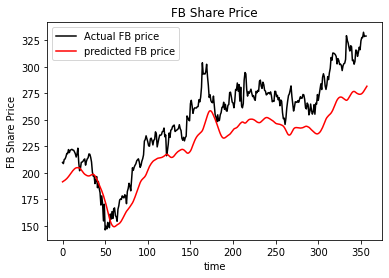

In [14]:
#Plot the test predictions
plt.plot(actual_prices,color="black",label=f"Actual {company} price")
plt.plot(predicted_prices,color="red",label=f"predicted {company} price")
plt.title(f"{company} Share Price")
plt.xlabel("time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()


In [15]:
#predicting next day (future prices)
real_data=[model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1),0]]

In [16]:
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

prediction=model.predict(real_data)
prediction=scaler.inverse_transform(prediction)
print(f"Prediction:{prediction}")

Prediction:[[281.7601]]
